# Notes

This notebook reproduces the ablation study results on
- penalized logP improvements of optimized molecules over input molecules, with similarity constraints of 0.4 and 0.6

# comparing similarity = 0.6 and 0.4

In [51]:
# check selected logp-sa results
# check all log folders containing qed and print the available results
import os
import numpy as np
import pandas as pd
project_home = '/mnt/retmol'
res_path = 'results_reproduce/plogp'

# sim=0.6
log_path = 'sim_0.6'
files = [f for f in os.listdir(os.path.join(project_home, res_path, log_path)) if f.startswith('chunk') and f.endswith('.csv')]
files.sort()
res = [pd.read_csv(os.path.join(project_home, res_path, log_path, file)) for file in files]
res = pd.concat(res, ignore_index=True)
res = res.drop_duplicates(subset='original_smiles', keep="last")
# drop na
res.loc[res['gen_logp-sa'].isnull(),'gen_logp-sa'] = res['original_logp-sa']

# sim=0.4
log_path = 'sim_0.4'
files = [f for f in os.listdir(os.path.join(project_home, res_path, log_path)) if f.startswith('chunk') and f.endswith('.csv') and 'val' not in f]
files.sort()
res1 = [pd.read_csv(os.path.join(project_home, res_path, log_path, file)) for file in files]
res1 = pd.concat(res1, ignore_index=True)
res1 = res1.drop_duplicates(subset='original_smiles', keep="last")
res1.loc[res1['gen_logp-sa'].isnull(),'gen_logp-sa'] = res1['original_logp-sa']

### plot molecules with large logp values (sim=0.4)

<Figure size 432x288 with 0 Axes>

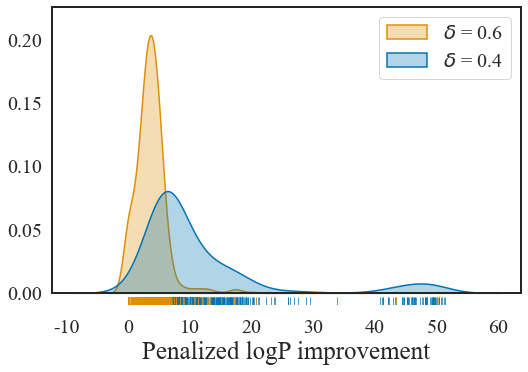

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', font="Times New Roman")

assert(all( res['original_logp-sa'] == res1['original_logp-sa'] ))

values = (res1['gen_logp-sa'] - res1['original_logp-sa']).tolist() + (res['gen_logp-sa'] - res['original_logp-sa']).tolist()
names = ['$\delta$ = 0.4'] * len(res1['gen_logp-sa']) + ['$\delta$ = 0.6'] * len(res['gen_logp-sa'])

fig = plt.figure()

data = pd.DataFrame({
    'values': values,
    'names': names,
})

ax = sns.displot(
   data=data, x="values", hue="names",
   fill=True, common_norm=False, palette="colorblind",
   alpha=.3, linewidth=1.5, rug=True, kind='kde', facet_kws=dict(despine=False), height=5, aspect=1.5,
   rug_kws={"alpha": 0.7, "height":0.03}, legend=False
)

ax.set(ylim=(-0.01, None))
ax.ax.spines['bottom'].set_position(('data', -0.00))
ax.ax.spines['left'].set_bounds((0, 0.2243))
ax.ax.spines['right'].set_bounds((0, 0.2243))
for _,s in ax.ax.spines.items():
    s.set_linewidth(2)

ax.ax.set_xticks([-10,0,10,20,30,40,50,60])
ax.ax.set_xticklabels([-10,0,10,20,30,40,50,60])
ax.ax.tick_params(axis='x', labelsize= 20, pad=20)
ax.ax.tick_params(axis='y', labelsize= 20)
ax.ax.set_xlabel('Penalized logP improvement', fontsize=25)
ax.ax.set_ylabel(None)

legend = plt.legend(labels=['$\delta$ = 0.6', '$\delta$ = 0.4'], fontsize=20)

# save plot
# ax.savefig("logp_compare_sim.pdf", bbox_inches='tight') 

# comparing with and without dynamic update

In [53]:
# check selected logp-sa results
# check all log folders containing qed and print the available results
import os
import numpy as np
import pandas as pd
project_home = '/mnt/retmol'
res_path = 'results_reproduce/plogp'

# with dynamic update
log_path = 'sim_0.4'
files = [f for f in os.listdir(os.path.join(project_home, res_path, log_path)) if f.startswith('chunk') and f.endswith('.csv') and 'val' not in f]
files.sort()
res = [pd.read_csv(os.path.join(project_home, res_path, log_path, file)) for file in files]
res = pd.concat(res, ignore_index=True)
res = res.drop_duplicates(subset='original_smiles', keep="last")
# drop na
res_dropna = res.dropna(subset=['gen_smiles'])

# without dynamic update
log_path = 'sim_0.4_wo_dynamic_update'
files = [f for f in os.listdir(os.path.join(project_home, res_path, log_path)) if f.startswith('chunk') and f.endswith('.csv') and 'val' not in f]
files.sort()
res1 = [pd.read_csv(os.path.join(project_home, res_path, log_path, file)) for file in files]
res1 = pd.concat(res1, ignore_index=True)
res1 = res1.drop_duplicates(subset='original_smiles', keep="last")
res1_dropna = res1.dropna(subset=['gen_smiles'])

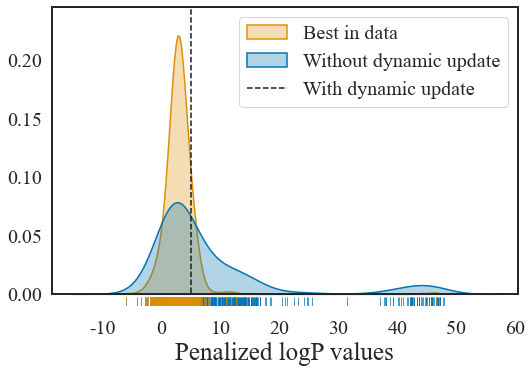

In [54]:
import os
import numpy as np
import pandas as pd
project_home = '/mnt/retmol/'

assert(all( res['original_logp-sa'] == res1['original_logp-sa'] ))

values = res_dropna['gen_logp-sa'].tolist() + res1_dropna['gen_logp-sa'].tolist()
names = ['With dynamic update'] * len(res_dropna['gen_logp-sa']) + ['Without dynamic update'] * len(res1_dropna['gen_logp-sa'])

data = pd.DataFrame({
    'values': values,
    'names': names,
})

ax = sns.displot(
    data=data, x="values", hue="names",
    fill=True, common_norm=False, palette="colorblind",
    alpha=.3, linewidth=1.5, kind='kde', 
    facet_kws=dict(despine=False), height=5, aspect=1.5,
    rug=True, rug_kws={"alpha": 0.7, "height":0.03, "label":'_nolegend_'}, 
    legend = False, 
)

data_attr = pd.read_csv(os.path.join(project_home, 
                        'data/zinc/train.logP-SA-recomputed'))
best_data_attr = max(data_attr['logp-sa'].tolist())
plt.axvline(x=best_data_attr, ymin=0.042, color='k', linestyle='--')

ax.set(ylim=(-0.01, None))
ax.ax.spines['bottom'].set_position(('data', -0.00))
ax.ax.spines['left'].set_bounds((0, 0.245))
ax.ax.spines['right'].set_bounds((0, 0.245))
for _,s in ax.ax.spines.items():
    s.set_linewidth(2)

ax.ax.set_xticks([-10,0,10,20,30,40,50,60])
ax.ax.set_xticklabels([-10,0,10,20,30,40,50,60])
ax.ax.tick_params(axis='x', labelsize= 20, pad=20)
ax.ax.tick_params(axis='y', labelsize= 20)
ax.ax.set_xlabel('Penalized logP values', fontsize=25)
ax.ax.set_ylabel(None)

lgd = plt.legend(labels=['Best in data', 'Without dynamic update', 'With dynamic update'], fontsize=20)

# save plot
# ax.savefig("logp_compare_dynamic_update.pdf", bbox_inches='tight') 

# QED - plot input qed distribution and output qed distribution

In [55]:
retsize=20
project_home = '/mnt/retmol'
res_path = 'results_reproduce/qed'

files = [f for f in os.listdir(os.path.join(project_home, res_path)) if f.endswith('.csv') and 'val' not in f]
if len(files) > 0:
    res = [pd.read_csv(os.path.join(project_home, res_path, file)) for file in files]
    res = pd.concat(res, ignore_index=True)

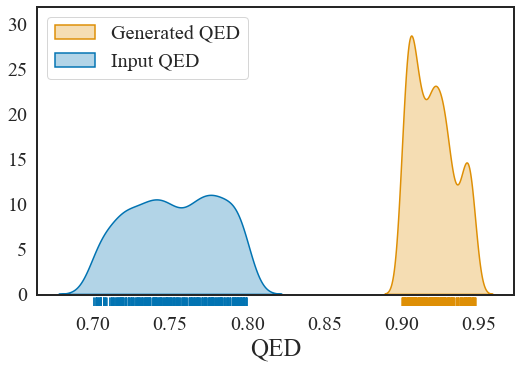

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
project_home = '/mnt/retmol/'

sns.set(style='white', font="Times New Roman")

values = res['original_qed'].tolist() + res['gen_qed'].tolist()
names = ['Input QED'] * len(res['original_qed']) + ['Generated QED'] * len(res['gen_qed'])

data = pd.DataFrame({
    'values': values,
    'names': names,
})

ax = sns.displot(
   data=data, x="values", hue="names",
   fill=True, common_norm=False, palette="colorblind",
   alpha=.3, linewidth=1.5, rug=True, kind='kde', facet_kws=dict(despine=False), height=5, aspect=1.5,
   rug_kws={"alpha": 0.7, "height":0.03}, legend = False
)

ax.set(ylim=(-1.3, None))
ax.ax.spines['bottom'].set_position(('data', -0.1))
ax.ax.spines['left'].set_bounds((0, 31.7))
ax.ax.spines['right'].set_bounds((0, 31.7))
for _,s in ax.ax.spines.items():
    s.set_linewidth(2)

ax.ax.tick_params(axis='x', labelsize= 20, pad=15)
ax.ax.tick_params(axis='y', labelsize= 20)
ax.ax.set_xlabel('QED', fontsize=25)
ax.ax.set_ylabel(None)

lgd = plt.legend(labels=['Generated QED', 'Input QED'], fontsize=20, loc='upper left')

# save plot
# ax.savefig("qed_in_out.pdf", bbox_inches='tight') 